# Preparing

## Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from alibaba_utils import *
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', 100)
matplotlib.rcParams.update({"font.size": 16,'lines.linewidth': 2.5})
# matplotlib.rcdefaults()

figures saved to /tmp/figures


In [2]:
DATA_DIR = 'data/alibaba_2020_dataset/'
dfj = get_df(DATA_DIR + 'pai_job_table.csv')
dft = get_df(DATA_DIR + 'pai_task_table.csv')
dfi = get_df(DATA_DIR + 'pai_instance_table.csv')
dfs = get_df(DATA_DIR + 'pai_sensor_table.csv')
dfg = get_df(DATA_DIR + 'pai_group_tag_table.csv')
dfp = get_df(DATA_DIR + 'pai_machine_spec.csv')
dfm = get_df(DATA_DIR + 'pai_machine_metric.csv')

## Join tables

`dfa`: DataFrame of Tasks

In [3]:
dfa = get_dfa(dft, dfj, dfi, dfg)
# dfa.to_csv('dfa.csv') # optional

dft + dfj ...
dft + dfj + dfi ...
dft + dfj + dfi + dfg ...


`dfw`: DataFrame of Workers

In [4]:
dfw = get_dfw(dfi, dft, dfg)
# dfw.to_csv('dfw.csv') # optional

dfi + dft ...
dfi + dft + dfg ...


`dfws`: DataFrame of Worker with sensor data

In [5]:
dfws = dfw.merge(dfp.drop(columns={'gpu_type'}), on='machine', how='left')
dfws = dfws.merge(dfs.drop(columns=['job_name','task_name','inst_id','machine']), on='worker_name')
# dfws.to_csv('dfws.csv') # optional

`dfas`: DataFrame of Task with sensor data

In [37]:
dfas = dfws.groupby(['job_name','task_name'])[['cpu_usage','gpu_wrk_util','avg_mem','avg_gpu_wrk_mem','plan_cpu','plan_gpu','plan_mem','cap_cpu','cap_gpu','cap_mem']].sum()
dfas = dfa.drop(columns=['plan_cpu','plan_mem','plan_gpu']).merge(dfas, on=['job_name','task_name'])
# dfas.to_csv('dfas.csv') # optional

In [38]:
dfas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850033 entries, 0 to 850032
Data columns (total 34 columns):
 #   Column           Non-Null Count   Dtype                        
---  ------           --------------   -----                        
 0   job_name         850033 non-null  object                       
 1   task_name        850033 non-null  object                       
 2   inst_num         850033 non-null  float64                      
 3   status           850033 non-null  object                       
 4   start_time       850033 non-null  float64                      
 5   end_time         591075 non-null  float64                      
 6   gpu_type         850032 non-null  object                       
 7   inst_id          850033 non-null  object                       
 8   user             850033 non-null  object                       
 9   status_j         850033 non-null  object                       
 10  start_time_j     850020 non-null  float64               

In [39]:
dfas.head()

,job_name,task_name,inst_num,status,start_time,end_time,gpu_type,inst_id,user,status_j,start_time_j,end_time_j,runtime,status_i,start_time_i,end_time_i,runtime_i,duration_min,wait_time,start_date,gpu_type_spec,group,workload,hourofyear,cpu_usage,gpu_wrk_util,avg_mem,avg_gpu_wrk_mem,plan_cpu,plan_gpu,plan_mem,cap_cpu,cap_gpu,cap_mem
0,c936346f45eccd34bf748541,tensorflow,1.0,Terminated,2693235.0,2695847.0,MISC,990f1799a5093b62142b101c0227875b81c7f0329301df98af1148ec8724,58540f191766,Terminated,2693235.0,2695847.0,2612.0,Terminated,2693240.0,2695847.0,2607.0,43.450000,5.0,1970-02-01 12:07:15+08:00,NaN,31c5b7fa71e1224f9dff5c5a4d24b571,NaN,780.0,350.353167,77.468451,24.306558,4.184025,600.0,50.0,29.296875,96,8,512
1,455c3dec270f4777ad67721c,tensorflow,1.0,Terminated,3399583.0,3399732.0,MISC,d94b4b01a6dd6c1865972cd628abe206422143ef37e6d449d4b2e862e574,ebba56ec23b9,Terminated,3399583.0,3399732.0,149.0,Terminated,3399681.0,3399732.0,51.0,0.850000,98.0,1970-02-09 16:19:43+08:00,NaN,5a3163d07db392e47b6f0d063906592f,NaN,976.0,117.888889,0.333333,1.870295,0.069743,600.0,100.0,29.296875,96,8,512
2,ba64aa2f0feff18428923e92,tensorflow,1.0,Terminated,2152271.0,2158213.0,MISC,af71dfe31db0378561e1bea2c26605f67cb7611f0d38661b43881a1c6006,de69ddc1064e,Terminated,2152271.0,2158213.0,5942.0,Terminated,2152280.0,2158213.0,5933.0,98.883333,9.0,1970-01-26 05:51:11+08:00,NaN,f94dcf2c0efdf3fd36f75dbe1709c43f,NaN,629.0,139.502103,4.408403,12.811959,4.212840,600.0,50.0,29.296875,96,8,512
3,704783be2a4b7f88b8d2e4ee,worker,100.0,Failed,2172980.0,NaN,MISC,a63da076c1210109040acf759e2c1d00b8abc2d84305990a5941d0142690,cfcb2e0deb93,Failed,2172974.0,2173216.0,NaN,Interrupted,2172995.0,NaN,NaN,NaN,15.0,1970-01-26 11:36:20+08:00,NaN,e933ce21ede6be61f206b69b225f9a4a,NaN,635.0,4152.975415,582.481221,821.026606,20.235918,27600.0,460.0,449.218750,4416,368,23552
4,bce3b9c55772f9d1e85fe796,PyTorchWorker,4.0,Failed,2374681.0,NaN,V100,8dd676ab7fef90186d5813c5255ce4e89b50bdd9854225e7fa082289c88f,11b3ab54fc9f,Failed,2374681.0,NaN,NaN,Interrupted,2374699.0,2378674.0,NaN,NaN,18.0,1970-01-28 19:38:01+08:00,V100,a2e43ea2be689ce60787b3174f3ffbbf,NaN,691.0,0.000000,0.000000,0.009766,0.000000,800.0,200.0,20.000000,192,16,1024


In [34]:
sum(dfas["duration_min"] > 15)

245314

In [40]:
# 8. (Optional) Filter out obviously invalid data
#    For example, negative timestamps, or plan_cpu < 0, etc.
# Drop the tasks with total duration less than 15 minutes because my simulation timestep is 15 minutes
dfas = dfas[dfas["duration_min"] >= 15]

# 9. Final check
print("Cleaned dataframe info:")
dfas.info()

Cleaned dataframe info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 245381 entries, 0 to 850031
Data columns (total 34 columns):
 #   Column           Non-Null Count   Dtype                        
---  ------           --------------   -----                        
 0   job_name         245381 non-null  object                       
 1   task_name        245381 non-null  object                       
 2   inst_num         245381 non-null  float64                      
 3   status           245381 non-null  object                       
 4   start_time       245381 non-null  float64                      
 5   end_time         242360 non-null  float64                      
 6   gpu_type         245381 non-null  object                       
 7   inst_id          245381 non-null  object                       
 8   user             245381 non-null  object                       
 9   status_j         245381 non-null  object                       
 10  start_time_j     245381 non-null

In [42]:
dfas.head()

,job_name,task_name,inst_num,status,start_time,end_time,gpu_type,inst_id,user,status_j,start_time_j,end_time_j,runtime,status_i,start_time_i,end_time_i,runtime_i,duration_min,wait_time,start_date,gpu_type_spec,group,workload,hourofyear,cpu_usage,gpu_wrk_util,avg_mem,avg_gpu_wrk_mem,plan_cpu,plan_gpu,plan_mem,cap_cpu,cap_gpu,cap_mem
0,c936346f45eccd34bf748541,tensorflow,1.0,Terminated,2693235.0,2695847.0,MISC,990f1799a5093b62142b101c0227875b81c7f0329301df98af1148ec8724,58540f191766,Terminated,2693235.0,2695847.0,2612.0,Terminated,2693240.0,2695847.0,2607.000,43.450000,5.0,1970-02-01 12:07:15+08:00,NaN,31c5b7fa71e1224f9dff5c5a4d24b571,NaN,780.0,350.353167,77.468451,24.306558,4.184025,600.0,50.0,29.296875,96,8,512
2,ba64aa2f0feff18428923e92,tensorflow,1.0,Terminated,2152271.0,2158213.0,MISC,af71dfe31db0378561e1bea2c26605f67cb7611f0d38661b43881a1c6006,de69ddc1064e,Terminated,2152271.0,2158213.0,5942.0,Terminated,2152280.0,2158213.0,5933.000,98.883333,9.0,1970-01-26 05:51:11+08:00,NaN,f94dcf2c0efdf3fd36f75dbe1709c43f,NaN,629.0,139.502103,4.408403,12.811959,4.212840,600.0,50.0,29.296875,96,8,512
7,b9b65eea61bc560c38628a7d,worker,80.0,Terminated,3028751.0,3093250.0,P100,69a94300b2822d08abc34db78baf2a73f0e2ef694010302c1aa547a0ef51,b2c52019b2c6,Terminated,3028709.0,3093306.0,64499.0,Terminated,3028753.0,3093250.0,64320.025,1072.000417,2.0,1970-02-05 09:19:11+08:00,NaN,34f4c162c6d6e4dcac70d3cf8088e0b0,NaN,873.0,1336.953143,84.901027,53.509810,33.383130,4500.0,375.0,102.539062,960,30,7680
8,cc98fd503972bea43b33f589,worker,20.0,Terminated,2414380.0,2415569.0,MISC,adb98bf035ee5e9434c27a8ab899d33889ff5631dc296508b0283bcb62b4,2d415d162cd1,Terminated,2409576.0,2415625.0,1189.0,Terminated,2414421.0,2415569.0,988.700,16.478333,41.0,1970-01-29 06:39:40+08:00,NaN,86f636753173acd82bd4357e98cef03a,NaN,702.0,3566.529427,17.651906,84.029903,6.760163,11400.0,380.0,556.640625,1824,152,9728
10,d76d4017df0414d7055f20b6,tensorflow,1.0,Terminated,2401728.0,2403150.0,MISC,b76e03aace7572b051ec084ab4b755dabb4069ae9278ca7d5cfbed816202,de69ddc1064e,Terminated,2401728.0,2403150.0,1422.0,Terminated,2401737.0,2403150.0,1413.000,23.550000,9.0,1970-01-29 03:08:48+08:00,NaN,81cfd4e86363439a0deda3981a2134de,NaN,699.0,121.258182,8.910394,3.697749,0.214487,600.0,25.0,29.296875,96,8,512


In [48]:
columns_to_extract = ['job_name', 'start_time', 'end_time', 'start_date', 'duration_min', 'cpu_usage', 'gpu_wrk_util', 'avg_mem', 'avg_gpu_wrk_mem']

# Sort the dataframe by start_time
dfas = dfas.sort_values(by='start_time')

#Crop the data to have a start_time higher than 2088000
dfas = dfas[dfas['start_time'] > 2088000]

dfas[columns_to_extract].to_csv('alibaba_2020_dataset/extracted_dfas.csv', index=False)

In [47]:
dfas.head()

,job_name,task_name,inst_num,status,start_time,end_time,gpu_type,inst_id,user,status_j,start_time_j,end_time_j,runtime,status_i,start_time_i,end_time_i,runtime_i,duration_min,wait_time,start_date,gpu_type_spec,group,workload,hourofyear,cpu_usage,gpu_wrk_util,avg_mem,avg_gpu_wrk_mem,plan_cpu,plan_gpu,plan_mem,cap_cpu,cap_gpu,cap_mem
135151,730ef96cef9b60c3e63c9c60,worker,20.0,Terminated,2088026.0,2177508.0,T4,e91b68921b2c75f854f95cfced0f9ca2f668a4e024435f9feef0b53c1ef9,4bd8fccce242,Terminated,2088023.0,2177520.0,89482.0,Terminated,2088028.0,2177508.0,74823.95,1247.065833,2.0,1970-01-25 12:00:26+08:00,NaN,daa6da4223ab284682bae7a3bf62c0d9,NaN,612.0,635.608101,41.888975,44.325893,1.007812,600.0,20.0,19.531250,192,4,1024
245970,1f33e99d05421f1e5fc96ff7,tensorflow,1.0,Terminated,2090770.0,2138211.0,MISC,9d49256cf2e26e7241465eac6c298fc1d153d15ebe6dbbca61bf511bd917,de69ddc1064e,Terminated,2090770.0,2138211.0,47441.0,Terminated,2090781.0,2138211.0,47430.00,790.500000,11.0,1970-01-25 12:46:10+08:00,NaN,6fe0ea8a6cf242997084c84fb100d23e,NaN,612.0,389.252669,5.302061,14.513472,5.391602,600.0,50.0,29.296875,96,8,512
260379,832553b4735fca781681be7d,tensorflow,1.0,Terminated,2090770.0,2138338.0,MISC,3a6425ca86395f1a2f40a19d77352ffc7ce8c8f9b9ebb98847852442400e,de69ddc1064e,Terminated,2090770.0,2138338.0,47568.0,Terminated,2090782.0,2138338.0,47556.00,792.600000,12.0,1970-01-25 12:46:10+08:00,NaN,c5f0549ddebc7ec837acd08075b71642,NaN,612.0,387.995807,7.616620,14.714706,5.391602,600.0,50.0,29.296875,96,8,512
247031,5fbbcb5baa6afb42f93fc1de,tensorflow,1.0,Terminated,2090770.0,2147170.0,MISC,24caf482c5fa48d7a76bbcdd7a5e35a13a64d0bf2536027047c56b8d1aec,de69ddc1064e,Terminated,2090770.0,2147170.0,56400.0,Terminated,2090781.0,2147170.0,56389.00,939.816667,11.0,1970-01-25 12:46:10+08:00,NaN,fc1228cf0ce631bdd1c93c456004b33f,NaN,612.0,424.634772,16.218125,15.199535,5.391602,600.0,50.0,29.296875,96,8,512
242444,a226e619c2c7cb875025e4fd,tensorflow,1.0,Terminated,2090770.0,2140131.0,MISC,993807ec92980297579da59e1746ca457c14f218484201d19753454b1a2b,de69ddc1064e,Terminated,2090770.0,2140131.0,49361.0,Terminated,2090781.0,2140131.0,49350.00,822.500000,11.0,1970-01-25 12:46:10+08:00,NaN,7c58961f58b34a62b740ac6e6a333c5a,NaN,612.0,373.686767,12.777902,14.563519,5.391602,600.0,50.0,29.296875,96,8,512


# Workload Characterization

## Overview

### Figure 2: Overview of MLaaS workloads

<Figure size 480x360 with 0 Axes>

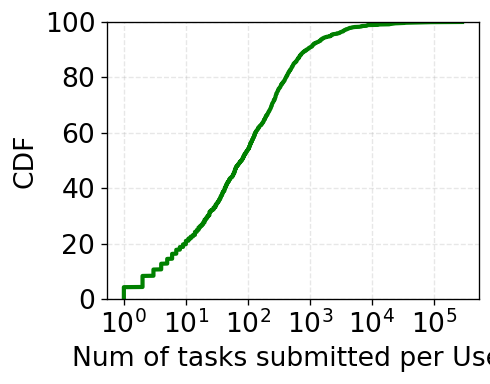

In [7]:
user_task_count = dfa.groupby('user').count()[['job_name']]

plt.figure(figsize=(4,3), dpi=120)
plot_data_cdf(user_task_count['job_name'], xlog=True,
              ylabel='CDF',xlabel='Num of tasks submitted per User',
              xticks=[1,10,100,10**3,10**4,10**5])

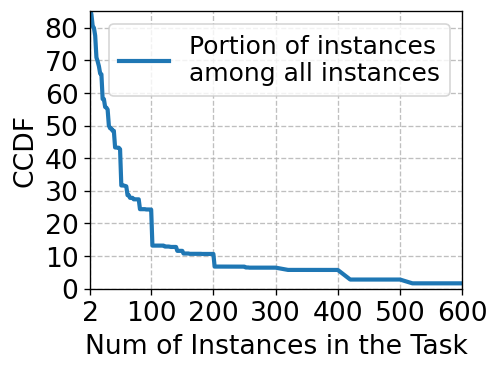

In [8]:
inst_num_list = list(range(2, 300, 2))+list(range(300, 620, 20))
inst_task_num_ratio_df = get_inst_task_num_ratio(dfa, inst_num_list) * 100

plt.figure(figsize=(4,3), dpi=120)
plt.plot(inst_task_num_ratio_df.T.num_inst_ratio, label='Portion of instances\namong all instances')
plt.grid(alpha=0.8, linestyle='--')
plt.xlabel('Num of Instances in the Task')
plt.ylabel('CCDF')
plt.xticks((2,100,200,300,400,500,600))
plt.yticks([0,10,20,30,40,50,60,70,80])
plt.xlim(2, 600)
plt.ylim(0, 85)
plt.legend(fontsize=15)

## Temporal Pattern

### Figure 3: Task submission patterns

Hour 0 Date: 1970-01-29 04:00:09+08:00


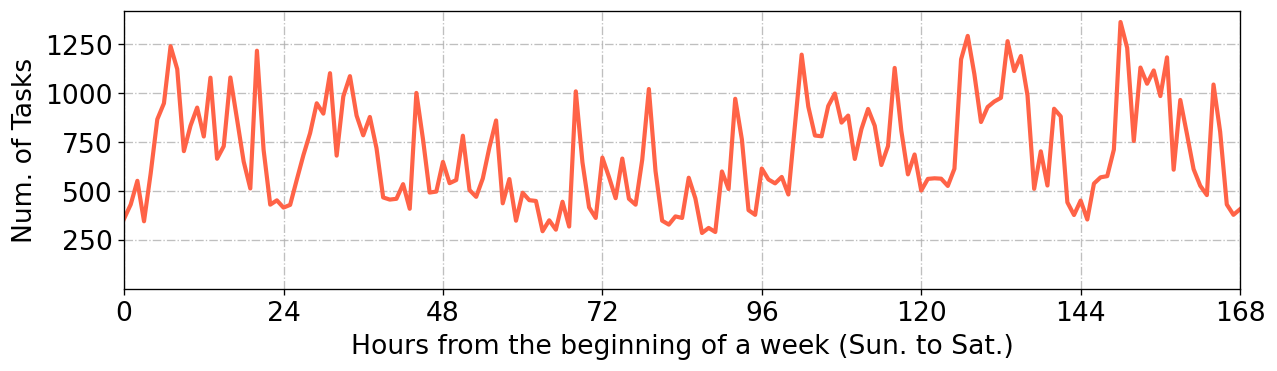

In [9]:
offset = -700
dfa['hourofyear'] = dfa.start_date.apply(lambda c: c.dayofyear * 24 + c.hour)
dftcc = dfa.groupby('hourofyear').count()[['job_name']].reset_index()
dftcc['hour'] = dftcc.hourofyear + offset
print('Hour 0 Date: {}'.format(dfa[dfa.hourofyear==-offset].start_date.min()))

plt.figure(figsize=(12,3), dpi=120)
num_days = 7
plt.plot(dftcc[(dftcc.hour>=0)&(dftcc.hour<24*num_days+1)].set_index('hour')[['job_name']], color='tomato')
plt.xlabel('Hours from the beginning of a week (Sun. to Sat.)')
plt.ylabel('Num. of Tasks')
plt.grid(alpha=0.8, linestyle='-.')
plt.xlim(0, 24*num_days)
plt.ylim(0, )
plt.yticks([250,500,750,1000,1250])
_ = plt.xticks([24 * x for x in range(num_days+1)])
# plt.savefig('/tmp/figures/{}.pdf'.format('diurnal-pattern-task'),bbox_inches='tight')

/lustre/guillant/new_green-dcc/utils.py:212: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable.
  for date in sorted(df.date.unique()):
/lustre/guillant/new_green-dcc/utils.py:218: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df = pd.DataFrame().append(sum_df_list)
/tmp/ipykernel_1346313/1452016240.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(data=hourly_task_data_df, x='hour', y='value', whis=1, fliersize=0, palette=color_palette)


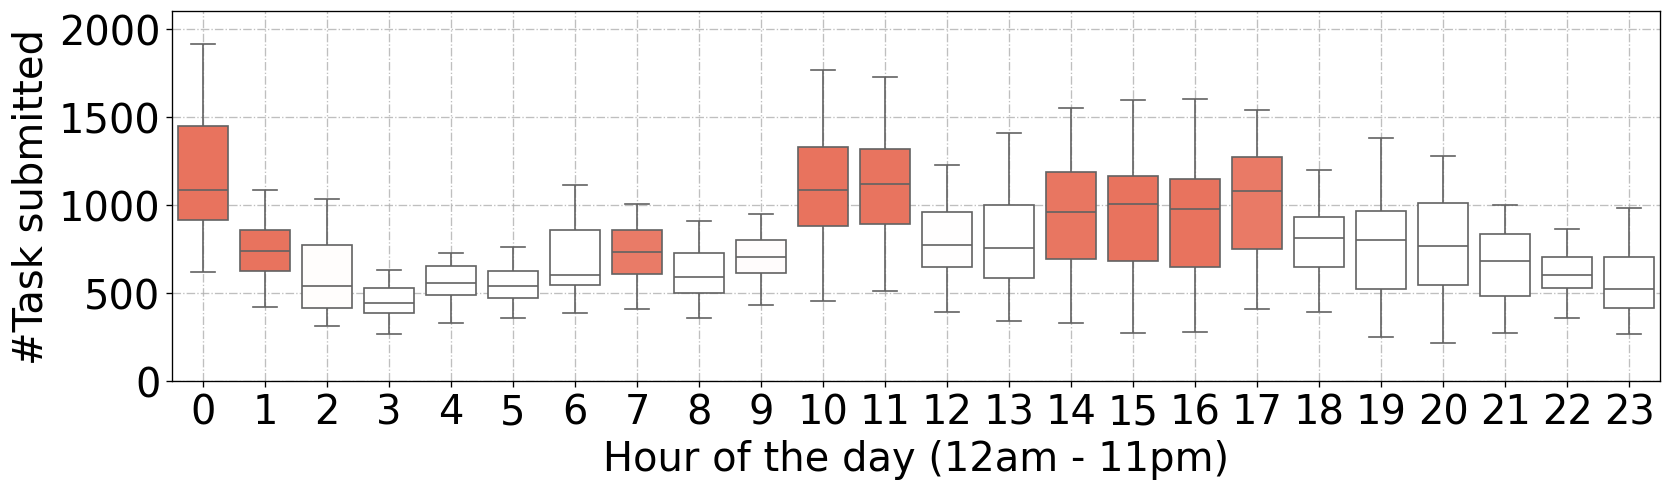

In [10]:
hourly_task = get_hourly_task_request(dfa)
hourly_task_data_df = pd.melt(hourly_task, 
    value_vars=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
hourly_task_data_df['hour'] = hourly_task_data_df['hour'].astype('int')

matplotlib.rcParams.update({"font.size": 24})
plt.figure(figsize=(16,4), dpi=120)
highlight_color = 'tomato'
mean_value = hourly_task_data_df.value.mean()
color_df = pd.DataFrame(hourly_task_data_df.groupby('hour').mean())
color_df['color'] = color_df.value.apply(lambda x: '1' if x < mean_value else highlight_color)
color_df['mean_value'] = mean_value
color_palette = sns.blend_palette(color_df.color.tolist(), n_colors=24)

g = sns.boxplot(data=hourly_task_data_df, x='hour', y='value', whis=1, fliersize=0, palette=color_palette)
g.set(ylim=(0, 2100))
g.set(xlabel='Hour of the day (12am - 11pm)')
g.set(ylabel='#Task submitted')
plt.yticks([0,500,1000,1500,2000])
plt.grid(alpha=0.8, linestyle='-.')
matplotlib.rcParams.update({"font.size": 16})
# plt.savefig('/tmp/figures/{}.pdf'.format('overview-task_submission_hourly'),bbox_inches='tight')

Hour 0 Date: 1970-01-29 04:00:09+08:00


/tmp/ipykernel_1346313/562616785.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfitcr = dfw.groupby('hourofyear').sum()[['plan_cpu','plan_gpu','plan_mem']].reset_index()


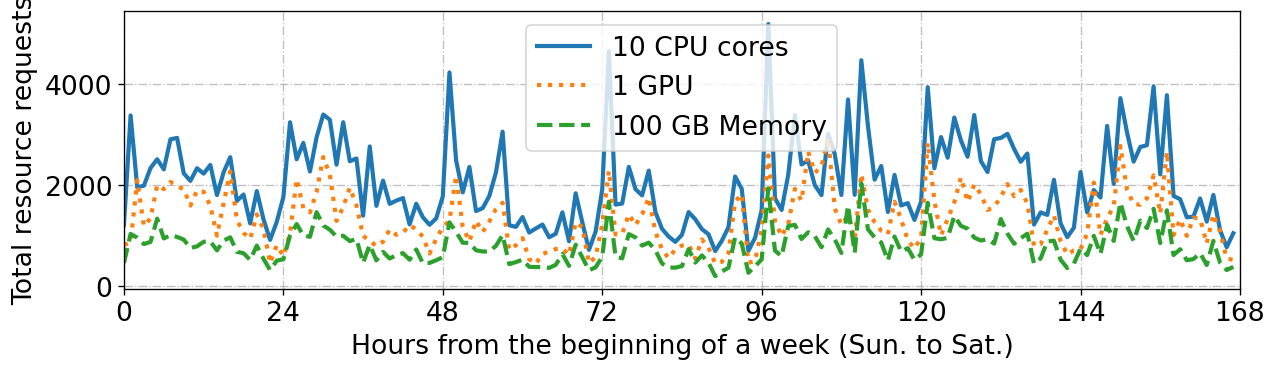

In [11]:
dfw['hourofyear'] = dfw.start_date.apply(lambda c: c.dayofyear * 24 + c.hour)
dfitcr = dfw.groupby('hourofyear').sum()[['plan_cpu','plan_gpu','plan_mem']].reset_index()
dfitcr['hour'] = dfitcr.hourofyear + offset
print('Hour 0 Date: {}'.format(dfa[dfa.hourofyear==-offset].start_date.min()))

plt.figure(figsize=(12,3), dpi=120)
num_days = 7
plt.plot(dfitcr[(dfitcr.hour>=0)&(dfitcr.hour<24*num_days)].set_index('hour')['plan_cpu']/1000, label='10 CPU cores', linestyle='solid')
plt.plot(dfitcr[(dfitcr.hour>=0)&(dfitcr.hour<24*num_days)].set_index('hour')['plan_gpu']/100, label='1 GPU', linestyle='dotted')
plt.plot(dfitcr[(dfitcr.hour>=0)&(dfitcr.hour<24*num_days)].set_index('hour')['plan_mem']/100, label='100 GB Memory', linestyle='dashed')
plt.xlabel('Hours from the beginning of a week (Sun. to Sat.)')
plt.ylabel('Total resource requests')
plt.grid(alpha=0.8, linestyle='-.')
plt.legend(ncol=1, loc='best')
plt.xlim(0, 24*num_days)
_ = plt.xticks([24 * x for x in range(num_days+1)])

In [16]:
dfw

,job_name,task_name,inst_name,worker_name,inst_id,status,start_time,end_time,machine,runtime,start_date,inst_num,status_t,start_time_t,end_time_t,plan_cpu,plan_mem,plan_gpu,gpu_type,user,gpu_type_spec,group,workload,hourofyear
0,31fe7a4e1565891f332f2b33,tensorflow,d3a2559f812a514b69832da5e024ca4a58be3acddd039c37f00bdd6ea646,7d677a8af756946d7e2d4ed024eb65475d0092361d7cb75f38f5431f4f82,4770ab9a93f5b311b629c66cfaa40ca41fb4485548b3375031d4167ed3cf,Failed,494366.0,NaN,34c2506b0fd012a7ba49cb71,NaN,1970-01-07 01:19:26+08:00,1.0,Failed,494319.0,NaN,600.0,29.296875,25.0,MISC,NaN,NaN,NaN,NaN,169.0
1,6be512ebc1890951ef8fe9a3,tensorflow,384cbee69562ef92e218b63f6a727a0d3f241bb4291665046810378b2cca,1e36d66d9b37bc0c82ee24a62af03f1176cf45f790e5a74ece2f58ab6671,ce060ae257ddd9e6e3118c75ae95d3b8896da466eb9fe932d89ca4fdd9cc,Failed,494377.0,NaN,95dd4e457bd5b15e593a160b,NaN,1970-01-07 01:19:37+08:00,1.0,Failed,494326.0,NaN,600.0,29.296875,25.0,MISC,NaN,NaN,NaN,NaN,169.0
2,418cf3def0eaa3389c8c743f,tensorflow,e014a607da9e552cedfa9cf26415240a12519bc2e40a86adb82af46d8f80,ae1854573395f140f7899065ac39421173cb76ef095c7a4549f151453d49,187346e2a6bb3ce2dfec8bb9dcb237c8e1cf4de3b4bcb0d3ee0a4e486e0b,Failed,516013.0,NaN,142a829a1e344f905fdcce42,NaN,1970-01-07 07:20:13+08:00,1.0,Failed,516002.0,NaN,600.0,29.296875,25.0,MISC,NaN,NaN,NaN,NaN,175.0
3,6ad04e6d3dd2c35e3a0c3e5f,tensorflow,a5b51ba177c9f11e1dc3b0e9fdc3b4bc9d2f3587c79bf3ac7a5e1efa2fd0,c5fdf47e3c0cd90f9411da1f4e5ed9310f5d078755951f24a3b7258ca2fd,9ef5598f518e76f7dd9a33fd55bbd00416f97b012ea83ce53de8ea12d974,Failed,516104.0,NaN,1a22c7040e090510e29bc619,NaN,1970-01-07 07:21:44+08:00,1.0,Failed,516023.0,NaN,600.0,29.296875,25.0,V100,NaN,NaN,NaN,NaN,175.0
4,193e6fdd5cb271f54d85f739,ps,78389d332aa67368c06bf7958c42a78ba4fb0667679327be2b8ef31c5614,b5627309306d0d68bee8edf6cf65c81f44fe87ed92a9f3d0da77c89c8e1a,b150d2eccab57c9539f8ba1c3804c37e5532e681dc7d0ac82d7eb964eb72,Failed,531747.0,NaN,9f75e9b83f6d914a91317c75,NaN,1970-01-07 11:42:27+08:00,1.0,Failed,531744.0,NaN,600.0,29.296875,NaN,NaN,NaN,NaN,NaN,NaN,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7164353,c3ec2fdc2c9851ec05821679,worker,4aeb94b170ae2ff985b49e9e9d2eb542b3f9f68a62e51dadc9320045bd54,b163fe10b425d7aa744218ca2ee8eeab3d3c552f0d58ea46c4910adc0ef8,eb0a36ef06020dfc9201ff682dc8dd71e525dc7ce4fda5aaf5acd111608c,Terminated,6450922.0,6450987.0,78ad1a1d5fc02a96b2d88de8,65.0,1970-03-16 23:55:22+08:00,5.0,Terminated,6450912.0,6450995.0,400.0,3.906250,100.0,MISC,5f4cb64dc693,NaN,2198a57c553c9553e968299cfc35d3d1,NaN,1823.0
7164354,441a581d0e816f1a216fe771,ps,728ed2a8aa3d299e174f1ecb626fdcbfa32bfc655a78bc953f920ddc2c0e,425edc9e8560acc59b7f41c7e51b5807731fe48e5ddfbe7f157fb218196b,7f9605cd188b61d450cff829d31f35c19fcd0dc976dec2457c6e9d970d08,Terminated,6450962.0,6451074.0,c24ffc81c9aa6f137f574214,112.0,1970-03-16 23:56:02+08:00,1.0,Terminated,6450959.0,6451074.0,600.0,29.296875,NaN,NaN,dda07b53e47d,NaN,f356e0aecf3157e8e304da2bd4115605,NaN,1823.0
7164355,75f4a69009b038960c8fec99,tensorflow,e1d1a70aa1bba8dc812e636ff369db4ab282d88676c25b73596ffc354f92,03014dfa775c6a37d957b4219cbd226ffc8b1afffba6f4367c5348e2266e,0a82d1aae5585e275f137e0ce0bc8e8f6e70d695178169e879a1d5717e6c,Terminated,6450970.0,6451092.0,cbbd429873e443159a84e71e,122.0,1970-03-16 23:56:10+08:00,1.0,Terminated,6450964.0,6451092.0,600.0,29.296875,100.0,MISC,05b25af4dd8b,NaN,8b5668c73326db7baeb419eef153a97e,NaN,1823.0
7164356,441a581d0e816f1a216fe771,worker,8cba5d20e56e6686cad688f20b981032e0aabd151116915b58b9dc106de0,f0ae6399c336ed54a36e652510f48e05e9c566645b13947c0bafb7acedcc,7f9605cd188b61d450cff829d31f35c19fcd0dc976dec2457c6e9d970d08,Terminated,6450997.0,6451019.0,4d362195c887cbfc274394e7,22.0,1970-03-16 23:56:37+08:00,1.0,Terminated,6450962.0,6451019.0,600.0,29.296875,100.0,T4,dda07b53e47d,NaN,f356e0aecf3157e8e304da2bd4115605,NaN,1823.0


/lustre/guillant/new_green-dcc/utils.py:233: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable.
  for date in sorted(df.date.unique()):
/lustre/guillant/new_green-dcc/utils.py:236: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res_df = tempdf.groupby('hour').sum()[['plan_resource']]
/lustre/guillant/new_green-dcc/utils.py:236: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res_df = tempdf.groupby('hour').sum()[['plan_resource']]
/lustre/guillant/new_green-dcc/utils.py:236: FutureWarning:

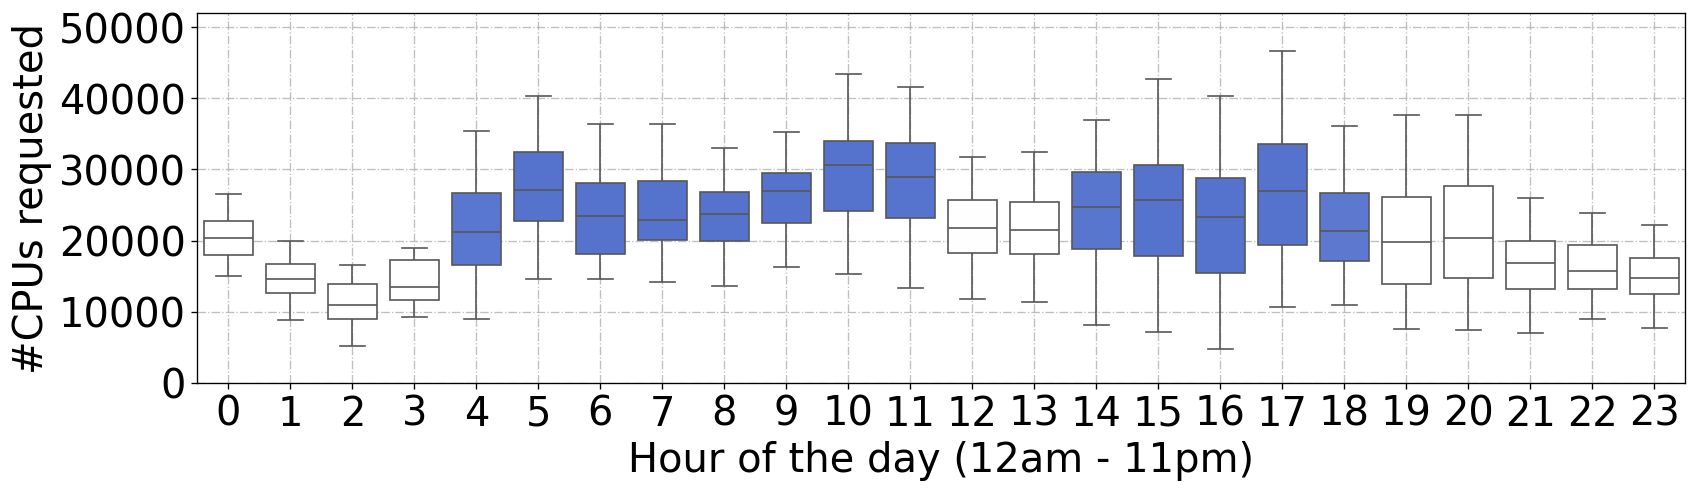

In [12]:
plan_cpu_df = get_hourly_task_resource_request(dfw.dropna(subset=['job_name']), metrics='cpu')
plan_cpu_data_df = pd.melt(plan_cpu_df, 
    value_vars=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
plan_cpu_data_df['hour'] = plan_cpu_data_df['hour'].astype('int')

matplotlib.rcParams.update({"font.size": 24})
plt.figure(figsize=(16,4), dpi=120)
highlight_color = 'royalblue'
mean_value = plan_cpu_data_df.value.mean()
color_df = pd.DataFrame(plan_cpu_data_df.groupby('hour').mean())
color_df['color'] = color_df.value.apply(lambda x: '1' if x < mean_value else highlight_color)
color_palette = sns.blend_palette(color_df.color.tolist(), n_colors=24)

g = sns.boxplot(data=plan_cpu_data_df, x='hour', y='value', whis=1, fliersize=0, palette=color_palette)
g.set(ylim=(0, 52000))
g.set(xlabel='Hour of the day (12am - 11pm)')
g.set(ylabel='#CPUs requested')
plt.grid(alpha=0.8, linestyle='-.')
matplotlib.rcParams.update({"font.size": 16})
# plt.savefig('/tmp/figures/{}.pdf'.format('overview-cpu_request_hourly'),bbox_inches='tight')

### Figure 4: Task runtime and wait time

In [ ]:
dfphilly = pd.read_csv('philly_runtime.csv')
# Source: https://github.com/msr-fiddle/philly-traces
# Myeongjae Jeon, et al. "Analysis of large-scale multi-tenant GPU clusters for DNN training workloads." USENIX ATC'19

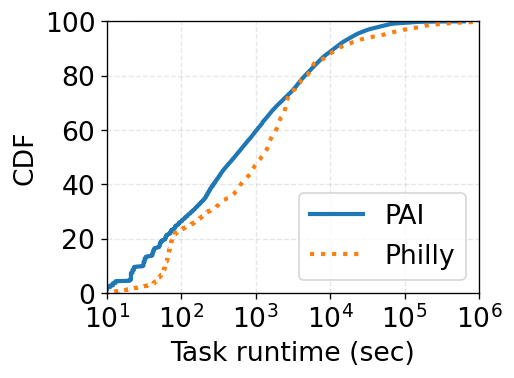

In [ ]:
plot_data_cdfs([dfa.runtime_i.dropna(),dfphilly.runtime.dropna()], ['PAI','Philly'],
               xticks=[10,100,1000,10000,10**5,10**6], xlim=[10,10**6],
               xlog=True, xlabel='Task runtime (sec)', loc='lower right')

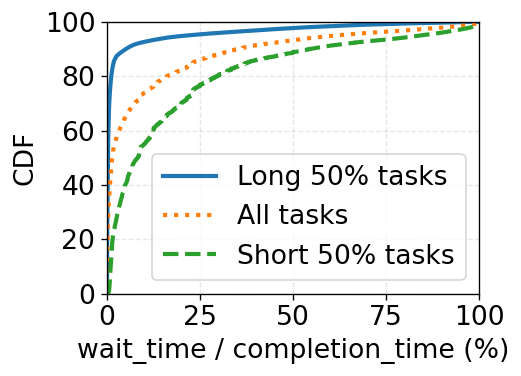

In [ ]:
data_df = dfa
median_time = data_df.runtime_i.median()
data_df['wait_over_completion'] = data_df['wait_time']/data_df['runtime']
plot_data_cdfs([100*data_df[data_df.runtime_i > median_time]['wait_over_completion'].dropna(),
                100*data_df['wait_over_completion'].dropna(),
                100*data_df[data_df.runtime_i <= median_time]['wait_over_completion'].dropna()],
               ['Long 50% tasks','All tasks','Short 50% tasks'], xlim=[0,100], 
               xlabel='wait_time / completion_time (%)', figsize=(4,3))

### Figure 5: Task wait time and runtime by GPU requests

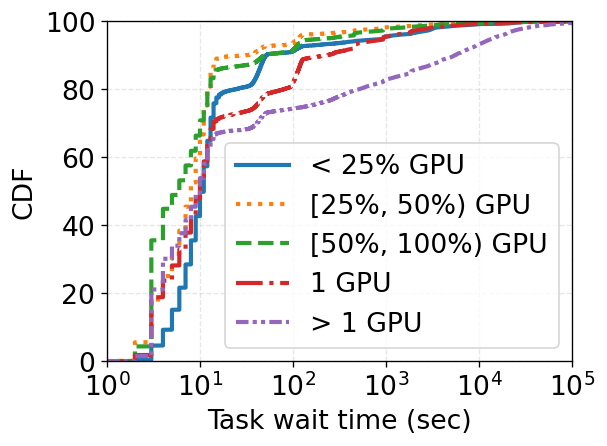

In [ ]:
data_df = dfa
data = [data_df[data_df.plan_gpu < 25].wait_time.dropna(),
        data_df[(data_df.plan_gpu >= 25)&(data_df.plan_gpu < 50)].wait_time.dropna(),
        data_df[(data_df.plan_gpu >= 50)&(data_df.plan_gpu < 100)].wait_time.dropna(),
        data_df[(data_df.plan_gpu ==100)].wait_time.dropna(),
        data_df[(data_df.plan_gpu > 100)].wait_time.dropna()]
data_label = ['< 25% GPU', '[25%, 50%) GPU', '[50%, 100%) GPU', '1 GPU','> 1 GPU']
plot_data_cdfs(data, datalabel=data_label, figsize=(5,3.75), dpi=120,
               xlog=True, xticks=[1,10,100,1000,10**4,10**5], xlim=(1, 10**5), xlabel='Task wait time (sec)')

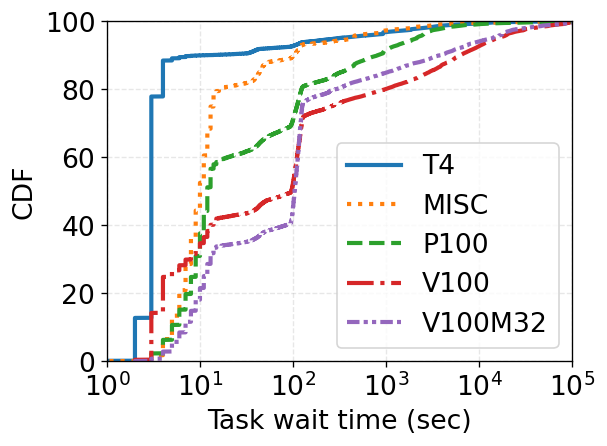

In [ ]:
data_df = dfa
data = [data_df[data_df.gpu_type=='T4'].wait_time.dropna(),
        data_df[data_df.gpu_type=='MISC'].wait_time.dropna(),
        data_df[data_df.gpu_type=='P100'].wait_time.dropna(),
        data_df[data_df.gpu_type=='V100'].wait_time.dropna(),
        data_df[data_df.gpu_type=='V100M32'].wait_time.dropna(),]
data_label = ['T4', 'MISC', 'P100', 'V100', 'V100M32']
plot_data_cdfs(data, datalabel=data_label, figsize=(5,3.75), dpi=120,
               xlog=True, xticks=[1,10,100,1000,10**4,10**5], xlim=(1, 10**5), xlabel='Task wait time (sec)')

Text(0.5, 0, 'Proportion of Tasks (%)')

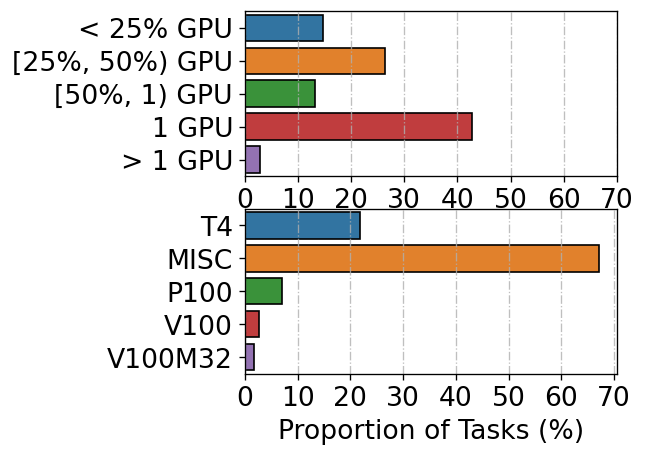

In [ ]:
data_df = dfa
data = [len(data_df[data_df.plan_gpu < 25]),
        len(data_df[(data_df.plan_gpu >= 25)&(data_df.plan_gpu < 50)]), 
        len(data_df[(data_df.plan_gpu >= 50)&(data_df.plan_gpu < 100)]), 
        len(data_df[(data_df.plan_gpu ==100)]),
        len(data_df[(data_df.plan_gpu > 100)]),
        len(data_df[data_df.gpu_type=='T4']),
        len(data_df[data_df.gpu_type=='MISC']),
        len(data_df[data_df.gpu_type=='P100']),
        len(data_df[data_df.gpu_type=='V100']),
        len(data_df[data_df.gpu_type=='V100M32'])]
data_plot = [100 * i / len(data_df.plan_gpu.dropna()) for i in data]
data_label = ['< 25% GPU', '[25%, 50%) GPU', '[50%, 1) GPU', '1 GPU','> 1 GPU',
'T4','MISC','P100','V100','V100M32']

f, axes = plt.subplots(2, 1, figsize=(4, 4), sharex=False, dpi=120)
rect = sns.barplot(y=data_label[:5], x=data_plot[:5], orient='h', ax=axes[0], edgecolor='black')
axes[0].grid(alpha=0.8, linestyle='-.',axis='x')
axes[0].set_xticks(range(0, 80, 10))
sns.barplot(y=data_label[5:], x=data_plot[5:], orient='h', ax=axes[1], edgecolor='black')
axes[1].grid(alpha=0.8, linestyle='-.',axis='x')
axes[1].set_xticks(range(0, 80, 10))
plt.xlabel('Proportion of Tasks (%)')

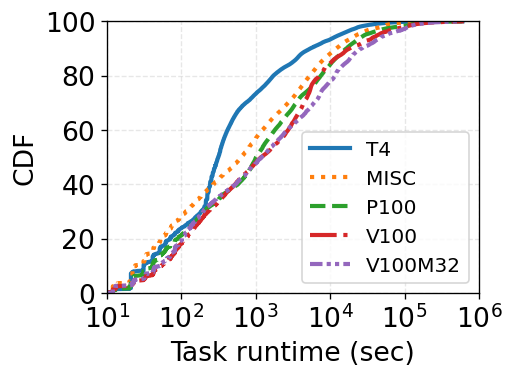

In [ ]:
data_df = dfa
data_label = ['T4', 'MISC', 'P100', 'V100', 'V100M32']
data=[data_df[(data_df.gpu_type==v) & (data_df.status=='Terminated')].runtime_i.dropna() for v in data_label]
plot_data_cdfs(data, data_label, xlabel="Task runtime (sec)", 
               xticks=[10**x for x in range(1, 7)], xlog=True,
               figsize=(4,3), dpi=120, xlim=[10, 10**6], fontsize=12)

## Spatial Pattern

### Figure 6: Task resource request and usage

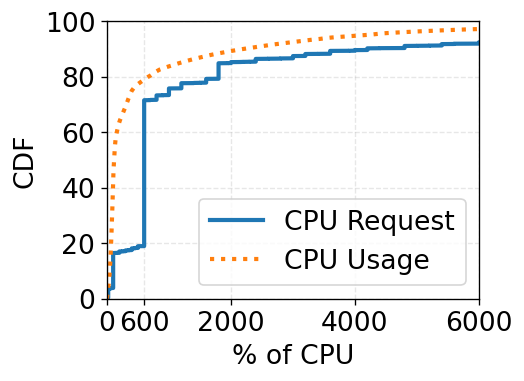

In [13]:
data_df = dfas
plot_data_cdfs([data_df['plan_cpu'].dropna(), data_df['cpu_usage'].dropna()], ['CPU Request', 'CPU Usage'],
               xlabel='% of CPU', xlim=(0, 6000), ylabel='CDF', xticks=[0,600,2000,4000,6000], dpi=120)

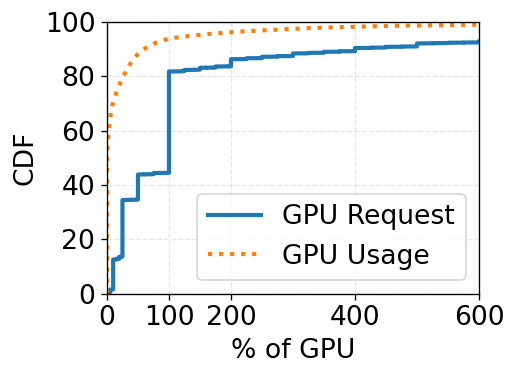

In [ ]:
data_df = dfas
plot_data_cdfs([data_df['plan_gpu'].dropna(), data_df['gpu_wrk_util'].dropna()], ['GPU Request', 'GPU Usage'],
               xlabel='% of GPU', xlim=(0, 600), ylabel='CDF', xticks=[0,100,200,400,600], dpi=120,loc='lower right')

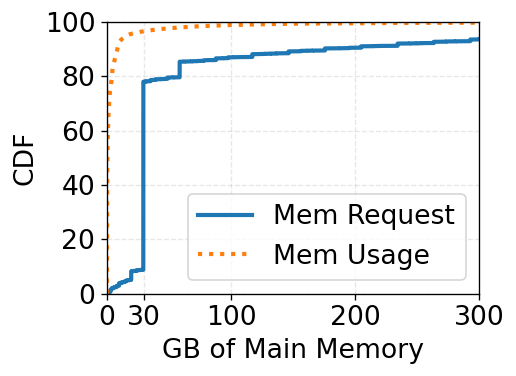

In [ ]:
data_df = dfas
plot_data_cdfs([data_df['plan_mem'].dropna(), data_df['avg_gpu_wrk_mem'].dropna()], ['Mem Request', 'Mem Usage'],
               xlabel='GB of Main Memory', xlim=(0, 300), ylabel='CDF', xticks=[0,30,100,200,300], dpi=120)

In [ ]:
dfa.columns

Index(['job_name', 'task_name', 'inst_num', 'status', 'start_time', 'end_time',
       'plan_cpu', 'plan_mem', 'plan_gpu', 'gpu_type', 'inst_id', 'user',
       'status_j', 'start_time_j', 'end_time_j', 'runtime', 'status_i',
       'start_time_i', 'end_time_i', 'runtime_i', 'duration_min', 'wait_time',
       'start_date', 'gpu_type_spec', 'group', 'workload', 'hourofyear',
       'wait_over_completion'],
      dtype='object')

cpu: plan > usage: 84.46%, plan < usage: 15.51%
gpu: plan > usage: 98.02%, plan < usage: 1.97%
mem: plan > usage: 95.88%, plan < usage: 4.12%


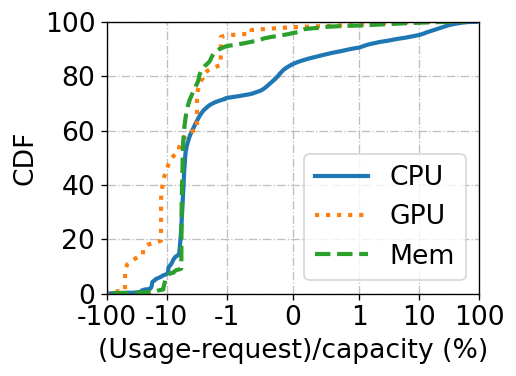

In [ ]:
pgu_datas, ugp_datas, pgu_label, ugp_label = plan_minus_usg_over_cap_task(dfas)
data = [(100 * ugp_datas[i]).tolist() + (-100 * pgu_datas[i]).tolist() for i in [0,1,2]]
datalabel = ['CPU','GPU','Mem']

from matplotlib.ticker import StrMethodFormatter, NullFormatter
fig, ax = plt.subplots(dpi=120, figsize=(4,3))
for i, d in enumerate(data):
    if type(data) == pd.DataFrame:
        d.dropna(inplace=True)
    x, y = get_cdf(d)
    label = datalabel[i] if datalabel is not None else None
    ax.plot(x, y, label=label, linestyle=linestyle_list[i % len(linestyle_list)][1])
ax.set_xscale('symlog', linscale=1, linthresh=1)
ax.set_yticks([0,20,40,60,80,100])
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.set_xlim([-100, 100])
ax.set_ylim([0,100])
ax.grid(alpha=0.8, linestyle='-.')
plt.ylabel('CDF')
plt.xlabel('(Usage-request)/capacity (%)')
ax.legend()

# Cluster Characteristics

## Machine resource usage

### Figure 8: Low in network input and CPU I/O wait time

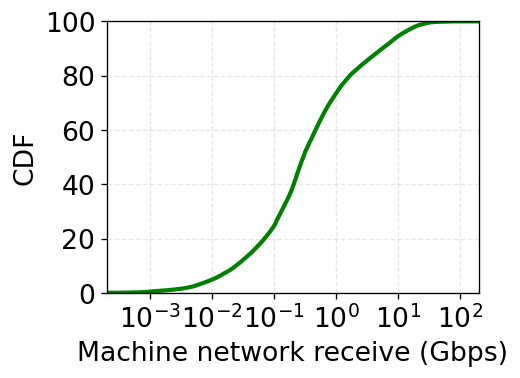

In [ ]:
plot_data_cdf(8*dfws.read.dropna()/(1024**3), xlog=True, figsize=(4,3),
              xticks=[10**-3, 10**-2, 10**-1, 1, 10, 100], xlim=[2*10**-4, 200],
              xlabel='Machine network receive (Gbps)')

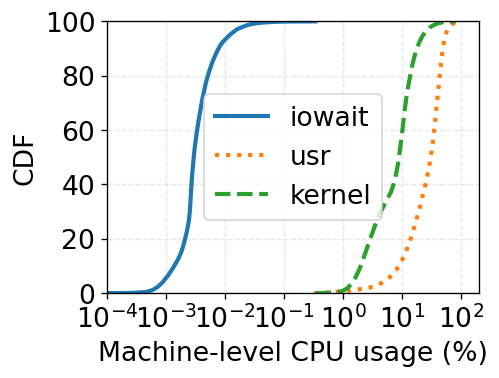

In [ ]:
plot_data_cdfs([dfm[x].dropna() for x in ['machine_cpu_iowait','machine_cpu_usr','machine_cpu_kernel']],
               ['iowait','usr','kernel'], xlog=True, figsize=(4,3),
               xticks=[10**-4,10**-3, 10**-2, 10**-1, 1, 10, 100], xlim=[10**-4, 200],
               xlabel='Machine-level CPU usage (%)')

In [14]:
import pandas as pd

# Load the datasets
DATA_DIR = 'data/alibaba_2020_dataset/'

sensor_columns = [
    "job_name", "task_name", "worker_name", "inst_id", "machine", "gpu_name",
    "cpu_usage", "gpu_wrk_util", "avg_mem", "max_mem", "avg_gpu_wrk_mem", "max_gpu_wrk_mem",
    "read", "write", "read_count", "write_count"
]

df_sensor = pd.read_csv(DATA_DIR + 'pai_sensor_table.csv', names=sensor_columns, header=0)
dfas = pd.read_csv(DATA_DIR + 'extracted_dfas.csv')

# Display dataset info
print("Sensor Table Columns:", df_sensor.columns)
print("Extracted Dataset Columns:", dfas.columns)


Sensor Table Columns: Index(['job_name', 'task_name', 'worker_name', 'inst_id', 'machine',
       'gpu_name', 'cpu_usage', 'gpu_wrk_util', 'avg_mem', 'max_mem',
       'avg_gpu_wrk_mem', 'max_gpu_wrk_mem', 'read', 'write', 'read_count',
       'write_count'],
      dtype='object')
Extracted Dataset Columns: Index(['job_name', 'start_time', 'end_time', 'start_date', 'duration_min',
       'cpu_usage', 'gpu_wrk_util', 'avg_mem', 'avg_gpu_wrk_mem'],
      dtype='object')


In [15]:
# Convert read/write bytes to GB (1 GB = 1024^3 bytes)
df_sensor["bandwidth_gb"] = (df_sensor["read"] + df_sensor["write"]) / (1024**3)

# Aggregate total bandwidth per task (group by job_name & task_name)
df_bandwidth = df_sensor.groupby(["job_name", "task_name"])["bandwidth_gb"].sum().reset_index()

# Display result
print(df_bandwidth.head())


                   job_name      task_name  bandwidth_gb
0  00003536c2d96e7db2a08aea     tensorflow      0.039525
1  0000407f42f4dddf0a49d7e5     tensorflow      0.106173
2  0000595a49fb4da8ad754d66  PyTorchWorker      0.000609
3  00006bf0df4fd39465f0879f     tensorflow      0.114151
4  00007e24e5fedde13a7cba0d         worker      1.390505


In [16]:
# Merge the bandwidth usage into the extracted dataset
dfas = dfas.merge(df_bandwidth, on=["job_name"], how="left")

# Fill missing bandwidth values with 0 (some tasks may not have network usage recorded)
dfas["bandwidth_gb"].fillna(0, inplace=True)

# Drop the "task_name" column
dfas.drop(columns=["task_name"], inplace=True)

# Display dataset with the new column
print(dfas.head())


                   job_name  start_time   end_time                 start_date  \
0  1f33e99d05421f1e5fc96ff7   2090770.0  2138211.0  1970-01-25 12:46:10+08:00   
1  832553b4735fca781681be7d   2090770.0  2138338.0  1970-01-25 12:46:10+08:00   
2  5fbbcb5baa6afb42f93fc1de   2090770.0  2147170.0  1970-01-25 12:46:10+08:00   
3  a226e619c2c7cb875025e4fd   2090770.0  2140131.0  1970-01-25 12:46:10+08:00   
4  91312bc8a8d5b9564f0bd480   2090771.0  2141713.0  1970-01-25 12:46:11+08:00   

   duration_min   cpu_usage  gpu_wrk_util    avg_mem  avg_gpu_wrk_mem  \
0    790.500000  389.252669      5.302061  14.513472         5.391602   
1    792.600000  387.995807      7.616620  14.714706         5.391602   
2    939.816667  424.634772     16.218125  15.199535         5.391602   
3    822.500000  373.686767     12.777902  14.563519         5.391602   
4    848.883333  412.619002     10.410062  14.656247         5.391602   

   bandwidth_gb  
0      0.000742  
1      0.000748  
2      0.005077  
3 

/tmp/ipykernel_2689197/2124672665.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfas["bandwidth_gb"].fillna(0, inplace=True)


In [17]:
# Save to a new CSV file
dfas.to_csv(DATA_DIR + 'extracted_dfas_with_bandwidth.csv', index=False)

print("Updated dataset saved as 'extracted_dfas_with_bandwidth.csv'.")


Updated dataset saved as 'extracted_dfas_with_bandwidth.csv'.
